輸入立委臉書粉專內容及選舉政見資料

In [67]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以花蓮縣立委蕭美琴為例，建立發文文字斷詞表

In [68]:
#fb 總共有哪些立委
fb['page_name'].unique()

array(['陳學聖', '陳明文', '蔡其昌', '趙天麟', '許淑華', '林昶佐 Freddy Lim', '蔡適應', '葉宜津',
       '蘇震清', '李昆澤', '柯呈枋', '陳亭妃', '顏寬恒', '陳賴素美 粉絲團', '呂孫綾', '立法委員 江永昌',
       '徐志榮', '陳玉珍 珍愛金門', '沈智慧', '賴瑞隆', '趙正宇', '蕭美琴 Bi-khim Hsiao', '洪慈庸',
       '管碧玲 (kuanbiling)', '李俊俋', '吳琪銘', '吳思瑤', '林岱樺', '江啟臣', '鄭寶清',
       '賴士葆', '邱志偉', '蘇巧慧', '黃秀芳', '王定宇', '張宏陸', '堅持．張廖萬堅', '李彥秀', '林德福',
       '黃國昌', '林淑芬', '立法委員林為洲', '蔡易餘 家己人', '愛信任-劉世芳', '高雄小金剛許智傑', '蘇治芬',
       '羅致政粉絲團', '羅明才', '劉建國', '何欣純', '立法委員 呂玉玲', '黃國書', '吳秉叡', '劉櫂豪',
       '柯建銘'], dtype=object)

In [69]:
hsiao = fb[fb.page_name == "蕭美琴 Bi-khim Hsiao"]
hsiao.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
9727,237292960686_10156110870930687,237292960686,蕭美琴 Bi-khim Hsiao,政治人物,到瑞穗參加活動，剛好今天流動攤商來到瑞穗擺夜市，三人行就順道來吃個蚵仔煎晚餐。,NaN,photo,https://www.facebook.com/237292960686/posts/10156110870930687/,2019-01-15T13:50:17+0000,2019-01-15T21:50:17,...,蕭美琴 Bi-khim Hsiao 貼文的相片,NaN,587,0,0,0,0,0,15,1


In [70]:
hsiao['new_date'] = pd.to_datetime(hsiao['created_time_taipei']).dt.date
hsiao['month_year'] = pd.to_datetime(hsiao['new_date']).dt.to_period('M')
hsiao.head(1)

<ipython-input-70-f4c5b1221fdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['new_date'] = pd.to_datetime(hsiao['created_time_taipei']).dt.date
<ipython-input-70-f4c5b1221fdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hsiao['month_year'] = pd.to_datetime(hsiao['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
9727,237292960686_10156110870930687,237292960686,蕭美琴 Bi-khim Hsiao,政治人物,到瑞穗參加活動，剛好今天流動攤商來到瑞穗擺夜市，三人行就順道來吃個蚵仔煎晚餐。,NaN,photo,https://www.facebook.com/237292960686/posts/10156110870930687/,2019-01-15T13:50:17+0000,2019-01-15T21:50:17,...,587,0,0,0,0,0,15,1,2019-01-15,2019-01


In [71]:
# 依照按讚數 低到高排序
hsiao = hsiao.sort_values(by=['like_count'])
# 用新的排序當作順序
hsiao.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [72]:
doc_names = range(len(hsiao)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 582)

In [73]:
hsiao = hsiao.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(hsiao['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [74]:
# 先看第一個
words = jieba.lcut(text_list[0], cut_all = False) # lcut return a "list"
print(words)

['【', '#', '2020年1月11日', '我們', '一起', '回家', '投票', '】', '\n', '\n', '花蓮人', '12', '/', '27', '就', '可以', '訂購', '選舉', '返鄉', '車票', '囉', '！', '\n', '\n', '．', '1', '/', '10', '-', '13', '返鄉', '車票', '：', '12', '/', '27', '（', '五', '）', '0', '時開', '放訂票', '\n', '．', '實名制', '返鄉', '車票', '：', '12', '/', '28', '（', '六', '）', '0', '時開', '放訂票', '\n', '\n', '👉', '台鐵訂', '票', '由此', '去', '：', 'https', ':', '/', '/', 'tip', '.', 'railway', '.', 'gov', '.', 'tw', '/', 'tra', '-', 'tip', '-', 'web', '/', 'tip', '/', 'tip001', '/', 'tip123', '/', 'query', '\n', '\n', '#', '2020', '花蓮', '要贏', '\n', '#', '請', '支持', '2', '號蕭美琴']


In [75]:
words = jieba.cut(text_list[0], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x00000222FE235F90>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [76]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
hsiao_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
hsiao_docs['jieba_results'] = hsiao_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪㊙️✨🔺😁😅😍⬇🙏✅🎈🔥📱👍👊🔸📍👉📢👩📌💼]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    hsiao_docs = hsiao_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [77]:
hsiao_docs.iloc[571:,]  #從讚數最多的檢查

,jieba_results
571,南下 會 勘 路邊 停 一下 買 咖啡 提神 結果 巧遇 這位 好久 不見 的 陳 昇 哥哥 原來 是 來 騎車 洗 溫泉 的
572,立法院 停班 沒 開會 早上 到羅東 搭車 要 回花蓮 下 一班 的 普悠瑪號 說 沒 位子 於 是 搭 了 區間 快車 這個 新車 其實 很 舒服 空位 多 隨便 挑 一個 小時 又 一分 就 到 了 雖然 比 普悠瑪 還要 慢 幾分鐘 但平 穩度 是勝 的 且 才 元 列車長 剪票 時 我問 了 一下 他 說 可能 宣傳 不夠 搭乘 這種 區間 快車 的 人 不 多 之前 要求 台鐵加開 這種 區間 快車 但台 鐵 都 以 車輛 老舊 淘汰 還需 維修 為 由 宣稱 加開 空間 有限 還好 去年底 已順利 發包 新 的 區間車 和 城際 列車 採購 等 新車 到位 後 在 北迴線 上 增加 幾班 這種車 在 花蓮羅東間 跑 也 可紓解 一部分 的 購票 壓力
573,主席 各位 同仁 今天 能夠 跟 大家 一起 努力 看到 這部法 的 通過 我 真是 百感交集 我 相信 在 台灣 的 人權 歷史 上 會 記錄 這 一天 會 記錄 各位 的 勇氣 和 堅持 當然 很多 人 參與 跟 努力 也 包含 在 外面 淋雨 日 曬 的 同志 夥伴 們 包含 祁家威 先生 我們 在 立法院 這些 年 在 推動 的 過程 當中 我 也 對 許多 同志 在 台灣 過去 社會 上 因為 資訊 的 扭曲 和 誤解 所 遭受 的 打壓 真的 是 感同身受 我們 台灣 有 很多 的 同志 因為 這些 打壓 而 持續 過在 憂鬱 和 壓抑 的 痛苦 之中 今天 我們 的 法案 通過 了 讓 他們 可以 出來 看見 彩虹 看見陽光 讓 他們 可以 像 每 一個 國人 一樣 享有 組成 自己 家庭 的 權利 但是 今天 我們 共同 維護 憲法 的 精神 處理 了 法律 的 架構 之外 我們 還有 許多 社會 的 對 話 和 溝通要 持續 努力 所以 我 在 這邊 要 對 許多 跟 我 一樣 是 基督徒 的 夥伴 們 說 我們 的 信仰 價值 是 包容 跟 博愛 神要 我們 關心 社會 上 最 弱小 的 子民 我們 不該 是 打壓 其他人 的 幫 兇 我們 應該 恩慈 相待 要 存憐憫 的 心 而 對 於 許多 多元性 別 族群 的 孩子 們 我 也 要 對 你 們 說 不要 怕 不要 躲藏 因為 你 們 不 孤單 因為 我們 會 跟 你 們 在 一起 請 勇敢 地 做 自己 因為 每個 人 都 值得 被 愛 謝謝
574,有人 說 我們 長 得 很 像 剛好 黃益中 到 花蓮來 初次 碰面 來 比 一下
575,很多 人 說 我 瘦 的 時候 長 得 跟 殷琪 董事 長 很 像 這次 大陸 工程 承包 仁水 隧道 工程 視察 後 跟 她 請 教 一下 東部 鐵路 升級 她 以過 去 高鐵 的 經驗 談 一些 看法 工程界 女性 很少 殷 董事 長 這樣 有 能力 有個 性 的 女性 讓 人 敬佩
576,我 這個 老 哥哥 到玉里 線 演唱 農青禾 市集 + 音樂會 歡迎 大家 一起 來 農青禾 音樂 埕
577,昨天晚上 買花 老 闆 小女 兒送 了 三顆 玉米 加切 好 的 芭樂 讓 我們 路上 不會 因 沒空 吃 晚餐 而 餓 肚子 花蓮處 處 是 溫暖 謝謝 你 們
578,新 看板 正式 上架 了 很多 朋友 都 說 好看 你們 覺得 如何 呢 因為 經費 拮据 看 板 上架 速度慢 了 一些 大家 都 比 我 還著 急 問我 怎麼 都 沒 有 看到 看 板 最近 會陸續 上架 謝謝 各方 的 支持 讓 我 繼續 拚 政治獻金 專戶 花蓮 第二 信用 合作社 中山 分社 年 立法委員 擬參選人 蕭美琴 政治獻金 專戶 線上 小額捐款 蕭美琴 立委 候選人 政治獻金 專戶
579,拜票 開心 碰到 這位 胖橘 可惜 他 不能 投 我
580,可愛的 弟弟 去 跟 他 媽媽 要 了 一杯 檸檬汁 原來 不是 自己 要 喝 而是 要 拿 來 給美琴 阿姨 的 然後他 就 戴 起 我 的 帽子 沿街 跟 著 幫忙 拉票 真是 厲害 的 助選 員


In [78]:
hsiao['jieba_results'] = hsiao_docs
hsiao_post = hsiao[['new_date','message','jieba_results','like_count']]
hsiao_post

,new_date,message,jieba_results,like_count
0,2019-12-26,【#2020年1月11日我們一起回家投票】\n\n花蓮人12/27就可以訂購選舉返鄉車票囉！\n\n．1/10-13返鄉車票：12/27（五）0時開放訂票\n．實名制返鄉車票：12/28（六）0時開放訂票\n\n👉台鐵訂票由此去：https://tip.railway.gov.tw/tra-tip-web/tip/tip001/tip123/query\n\n#2020花蓮要贏\n#請支持2號蕭美琴,年月日 我們 一起 回家 投票 花蓮人 就 可以 訂購 選舉 返鄉 車票 囉 ． 返鄉 車票 五 時開 放訂票 ． 實名制 返鄉 車票 六 時開 放訂票 台鐵訂 票 由此 去 花蓮 要贏 請 支持 號蕭美琴,101
1,2019-03-04,循環經濟進入體育世界的最高典範！\n\nhttps://www.seinsights.asia/article/3289/3270/4662,循環 經濟 進入 體育 世界 的 最高 典範,135
2,2019-01-17,,,166
3,2019-02-25,"今天在交通委員會討論酒駕問題, 除了我在內的多位委員提出提高刑責和罰款等加重處罰之外, 我特別提出討論酒精鎖的政策可行性問題. 美國已經使用多年, 且已經證實能降低酒駕再犯機率的酒精鎖 ignition interlock, 透過強制加裝在汽機車上, 駕駛者吹氣確認沒有酒精超標, 車子才能解鎖. 系統還會連線相關執法單位, 能智慧化掌握曾犯酒駕者的車輛使用狀況. 新的系統還有人臉辨識, GPS管理等智慧化技術, 讓酒駕者無法以他人吹氣解鎖. 目前台灣有三重客運和首都客運基於自主性管理已經加裝, 可強化民眾對駕駛安全的信任和管理的便利. 而法務部蔡部長回應時表示, 法務部將在本周邀其跨部會討論此議題的執行面向和適用範圍.\n\nhttps://www.youtube.com/watch?v=w1uS3QD8Pnc\n\nhttps://www.lifesafer.com/devices/what-is-an-interlock/","今天 在 交通 委員 會 討論 酒駕 問題 , 除了 我 在內 的 多位 委員 提出 提高 刑責 和 罰款 等 加重 處罰 之外 , 我 特別 提出 討論 酒精 鎖的 政策 可行性 問題 美國 已經 使用 多年 , 且 已經 證實 能 降低 酒駕 再犯 機率 的 酒精 鎖 , 透過 強制 加裝 在 汽機車 上 , 駕駛者 吹氣 確認 沒有 酒精 超標 , 車子 才能 解鎖 系統 還會 連線 相關 執法 單位 , 能 智慧 化 掌握 曾犯 酒駕 者 的 車輛 使用 狀況 新 的 系統 還有 人臉 辨識 , 管理 等 智慧 化技術 , 讓 酒駕 者 無法 以 他人 吹氣 解鎖 目前 台灣 有 三重 客運 和 首都 客運 基於 自主性 管理 已經 加裝 , 可強 化民眾 對 駕駛 安全 的 信任 和 管理 的 便利 而 法務部 蔡部長 回應 時 表示 , 法務部將 在 本周 邀其 跨部會 討論 此議題 的 執行 面向 和 適用 範圍 /",172
4,2019-02-14,高俊明牧師，今天下午安息主懷。很多人稱他為人格者，台灣人權和獨立之路雖然崎嶇坎坷，背著台灣十字架的他，公義的冠冕當為之存留。,高俊明 牧師 今天下午 安息 主懷 很多 人稱 他 為 人格 者 台灣 人權 和 獨立 之路 雖然崎嶇 坎坷 背著 台灣 十字架 的 他 公義的 冠冕 當為 之 存留,177
...,...,...,...,...
577,2019-12-01,昨天晚上買花，老闆小女兒送了三顆玉米加切好的芭樂，讓我們路上不會因沒空吃晚餐而餓肚子。花蓮處處是溫暖，謝謝你們！,昨天晚上 買花 老 闆 小女 兒送 了 三顆 玉米 加切 好 的 芭樂 讓 我們 路上 不會 因 沒空 吃 晚餐 而 餓 肚子 花蓮處 處 是 溫暖 謝謝 你 們,13993
578,2019-10-02,新看板正式上架了，很多朋友都說好看，你們覺得如何呢？\n\n因為經費拮据，看板上架速度慢了一些，大家都比我還著急，問我怎麼都沒有看到看板。最近會陸續上架，謝謝各方的支持，讓我繼續拚！\n \n【政治獻金專戶】\n花蓮第二信用合作社（中山分社）216\n0200-0100-029-026\n109年立法委員擬參選人蕭美琴政治獻金專戶\n\n【線上小額捐款】\nhttps://donate.newebpay.com/蕭美琴立委候選人政治獻金專戶/bikhim,新 看板 正式 上架 了 很多 朋友 都 說 好看 你們 覺得 如何 呢 因為 經費 拮据 看 板 上架 速度慢 了 一些 大家 都 比 我 還著 急 問我 怎麼 都 沒 有 看到 看 板 最近 會陸續 上架 謝謝 各方 的 支持 讓 我 繼續 拚 政治獻金 專戶 花蓮 第二 信用 合作社 中山 分社 年 立法委員 擬參選人 蕭美琴 政治獻金 專戶 線上 小額捐款 蕭美琴 立委 候選人 政治獻金 專戶,14358
579,2019-12-14,拜票開心碰到這位胖橘，可惜他不能投我！,拜票 開心 碰到 這位 胖橘 可惜 他 不能 投 我,14631
580,2019-11-24,可愛的弟弟，去跟他媽媽要了一杯檸檬汁，原來不是自己要喝，而是要拿來給美琴阿姨的！ 然後他就戴起我的帽子沿街跟著幫忙拉票，真是厲害的助選員！,可愛的 弟弟 去 跟 他 媽媽 要 了 一杯 檸檬汁 原來 不是 自己 要 喝 而是 要 拿 來 給美琴 阿姨 的 然後他 就 戴 起 我 的 帽子 沿街 跟 著 幫忙 拉票 真是 厲害 的 助選 員,19231


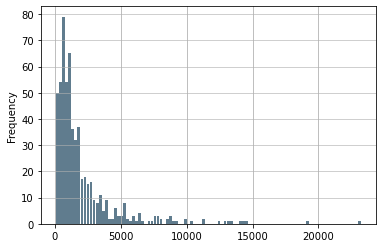

In [79]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = hsiao_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [80]:
temp = hsiao_post[(hsiao_post['like_count'] <= 5000) & (hsiao_post['like_count'] > 1500)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
338,2019-11-08,今晚你有來變魔法嗎？\n紙風車劇團「紙風車的魔法書」表演來了將近三千人，感謝這麼多的爸爸媽媽願意陪小朋友看劇，現場不分大小大家一起和動物比賽運動會、和巫媽媽巫師一起變魔法。\n今天我也戴上魔法帽和大家一起度過歡樂的夜晚，小孩的笑聲是最療癒的音樂啊！\n謝謝大家參加，也對沒有位置坐的朋友抱歉，接下來的卡車藝術特技表演也歡迎再來喔！！\n\n【活動預告】\n11/29（五）19：00\n北埔加油站前廣場,今晚 你 有 來 變 魔法 嗎 紙風車劇團 紙風車 的 魔法 書 表演 來 了 將近 三千 人 感謝 這麼 多 的 爸爸 媽媽 願意 陪 小朋友 看劇 現場 不分 大小 大家 一起 和 動物 比賽 運動會 和 巫媽媽 巫師 一起 變 魔法 今天 我 也 戴 上 魔法 帽 和 大家 一起 度過 歡樂 的 夜晚 小孩 的 笑 聲 是 最療 癒 的 音樂 啊 謝謝 大家 參加 也 對 沒 有 位置 坐 的 朋友 抱歉 接下 來 的 卡車 藝術 特技表演 也 歡迎 再 來 喔 活動 預告 五 北埔 加油站 前 廣場,1505
339,2019-08-30,連總統都曾參訪的林田山林業文化園區，正規畫中長期整建計畫，美琴今天和農委會主委前往關心，爭取主委的大力支持，也獲得正面回應。\n\n林田山有豐富的歷史文化內涵，深具發展潛力。在維持原貌的基礎上加以整建，復駛林區小火車，食堂恢復供餐，再提供long stay林業聚落生活體驗，加上友善耕作農友和原住民傳統作物銷售的場所、吸引在地藝術家駐村等，可望成為地方的新亮點。,連 總統 都 曾 參訪 的 林田 山林 業 文化 園區 正規畫 中 長期 整建 計畫 美琴 今天 和 農委會 主委 前往 關心 爭取 主委 的 大力支持 也 獲得 正面 回應 林田山 有 豐富 的 歷史 文化 內涵 深具 發展 潛力 在 維持 原貌 的 基礎 上 加以 整建 復駛 林區 小火 車 食堂 恢 復 供餐 再 提供 林業 聚落 生活 體驗 加上 友善 耕作 農友 和 原住民 傳統 作物 銷售 的 場所 吸引 在 地 藝術 家 駐村 等 可望 成為 地方 的 新亮點,1508
340,2019-06-18,早上跟花蓮農改場同仁到壽豐鄉秋行軍蟲淪陷的有機田區關心，也發現有疑似成蟲。防疫已進入第二階段，就是不掩埋銷毀而是全面噴藥。有機田區噴藥選項比較有限，但有農政單位核可的有機資材蘇力菌和矽藻土，不影響有機驗證，呼籲農民積極防治，避免災情再擴大。我也自費印製許多海報傳單，讓沒有在上網用群組的長輩農友更易於辨識。,早上 跟 花蓮農 改場 同仁 到壽 豐鄉 秋行軍蟲 淪陷 的 有 機田區 關心 也 發現 有 疑似 成蟲 防疫 已 進入 第二 階段 就是 不 掩埋 銷毀 而是 全面 噴藥 有 機田區 噴藥 選項 比 較 有限 但 有 農政 單位 核 可 的 有 機資材 蘇力 菌 和 矽藻 土 不影響 有 機驗證 呼籲 農民積極 防治 避免 災情 再 擴大 我 也 自費 印 製 許 多 海 報 傳 單 讓 沒 有 在 上網 用 群組 的 長輩 農友 更易 於 辨識,1518
341,2019-08-25,颱風遠離，南下瞭解災情。金針花盛名的赤柯山和六十石山道路已由地方政府在第一時間搶通了。山上花海依然美麗，沿路碰到不少遊客還是專程前來。\n\n另外各村有幾處因雨勢太大造成土石坍方和積水比較嚴重，我也協同水保局專業人員現勘，盼協助民眾恢復安全。其中一農戶家中被後方高處農田宣泄不及的大水帶動邊坡坍方，土石掩埋窗戶外面，整個廚房浴室都是泥沙，算是比較嚴重的。還好人員平安，天祐花蓮。,颱 風遠離 南下 瞭解 災情 金針 花 盛名 的 赤柯山 和 六十 石山 道路 已 由 地方 政府 在 第一 時間 搶通 了 山上 花海 依然 美麗 沿路 碰到 不少 遊客 還是 專程 前來 另外 各村 有 幾處 因雨 勢太大 造成 土石 坍方 和 積水 比較 嚴重 我 也 協同 水保局 專業 人員現 勘 盼 協助民眾 恢 復 安全 其中 一農戶 家中 被後方 高處 農田 宣泄 不及 的 大水 帶動 邊坡 坍方 土石 掩埋 窗戶 外面 整個 廚房 浴室 都 是 泥沙 算是 比較 嚴重 的 還 好人 員 平安 天 祐 花蓮,1520
342,2019-09-01,位在壽豐鄉的立川漁場，今天舉辦黃金蜆節，數百人一起摸蜆的畫面蠻震撼的。 \n\n立川實在是農村企業的典範，從養殖生產，到加工、結合餐飲、觀光休閒、環境教育… 實踐了產業六級化的加值效應；整個暑假遊客爆滿，也提供了許多在地的工作機會。再說，他們的餐還蠻好吃的，人沒有爆滿時我很喜歡來的！,位 在 壽 豐鄉 的 立川 漁場 今天 舉辦 黃 金 蜆節 數百人 一起 摸 蜆 的 畫面 蠻 震撼 的 立川實 在 是 農村 企業 的 典範 從養殖 生產 到 加工 結合餐 飲 觀光 休閒 環境 教育 實踐 了 產業 六級化 的 加值 效應 整個 暑假 遊客 爆滿 也 提供 了 許多 在 地 的 工作 機會 再 說 他們 的 餐 還蠻 好吃 的 人 沒 有 爆滿時 我 很 喜歡 來 的,1522
...,...,...,...,...
524,2019-12-25,【2020年1月11日，我們一起回家投票！】\n \n在外地打拼、讀書的花蓮朋友們辛苦了，#這次2020選舉返鄉台鐵火車票在12月27日的0時就可以訂票囉（#就是26號晚上）！\n \n還有此次選舉返鄉的花東居民實名制訂票是在12月28日的0時開放訂票，花蓮的朋友不要忘記喔！\n \n👉台鐵訂票由此去：https://tip.railway.gov.tw/tra-tip-web/tip/tip001/tip123/query\n \n \n珍惜行使民主的權利，關心花蓮的未來，大家一起投起來！\n1月11日，我們回家投票！\n \n \n#2020花蓮要贏\n#請支持2號蕭美琴,年月日 我們 一起 回家 投票 在 外地 打拼 讀書 的 花蓮 朋友 們 辛苦 了 這次 選舉 返鄉 台鐵火 車票 在 月 日 的 時 就 可以 訂票 囉 就是 號 晚上 還有 此次 選舉 返鄉 的 花東 居民 實名 制訂 票 是 在 月 日 的 時開 放訂票 花蓮 的 朋友 不要 忘記 喔 台鐵訂 票 由此 去 珍惜 行使 民主 的 權利 關 心花 蓮 的 未來 大家 一起 投起 來 月 日 我們 回家 投票 花蓮 要贏 請 支持 號蕭美琴,4685
525,2019-08-09,#我挺紙風車\n感謝紙風車曾經多次來到花蓮各鄉鎮公益演出，讓藝術下鄉，帶給孩子們歡笑與感動。劇團每一位演出人員奔波至最偏遠的鄉鎮、半夜巴士走蘇花公路就為了節省住宿費用，真的辛苦你們了，也謝謝你們！,我 挺 紙風車 感謝 紙風車 曾經 多次 來 到 花蓮 各 鄉鎮 公益 演出 讓 藝術 下鄉 帶給 孩子 們 歡笑 與 感動 劇團 每 一位 演出 人員 奔波 至 最 偏遠 的 鄉鎮 半夜 巴士 走 蘇花 公路 就 為 了 節省 住宿 費用 真的 辛苦 你們 了 也 謝謝 你 們,4743
526,2019-11-12,只有今夜,只有 今夜,4755
527,2019-06-09,力挺改革、維護主權、守護下一代。支持穩健做事的蔡英文，明天開始民調電話拜託大家一起助小英、護台灣。代號 #助英台！,力挺 改革 維護 主權 守護 下一代 支持 穩健 做事 的 蔡英文 明天 開始 民調 電話 拜託 大家 一起 助小英 護 台灣 代號 助英台,4840


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [81]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [82]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [83]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一些,一人,一人承擔,一代,一件,一位,一併,一個,一切都是,...,黑美人,黑豆,默默,點半,點在,點至,點開,黨內,鼓勵,齊發
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187,0.0,0.0,0.0,0.0,0.0,0.0,0.160327,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=6, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['有機', '我們', '今天', '美琴', '一起', '大家', '時間', '後援會', '台灣', '花蓮']
TOP 10 WORDS PER TOPIC #1
['政治', '總統', '選舉', '國際', '加油', '國家', '民主', '中國', '我們', '台灣']
TOP 10 WORDS PER TOPIC #2
['社區', '會做事', '我們', '後援會', '大家', '參拜', '美琴', '歡迎', '可以', '花蓮']
TOP 10 WORDS PER TOPIC #3
['支持', '總統', '爭取', '訂票', '今天', '一起', '我們', '朋友', '大家', '花蓮']
TOP 10 WORDS PER TOPIC #4
['活動', '晚上', '紙風車', '美琴', '文化', '朋友', '今天', '一起', '大家', '花蓮']
TOP 10 WORDS PER TOPIC #5
['進度', '問題', '隧道', '路段', '評估', '要求', '公路', '改善', '工程', '蘇花']


In [85]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['只有', '我們', '公路', '早就', '大家', '今夜', '農民', '蘇花', '紙風車', '花蓮']
TOP 10 WORDS PER TOPIC #1
['早安', '快樂', '文旦', '花蓮', '香港', '大家', '行程', '烤肉', '提醒', '台灣']
TOP 10 WORDS PER TOPIC #2
['加油', '大家', '我們', '這個', '歡迎', '美琴', '時間', '台灣', '後援會', '西瓜']
TOP 10 WORDS PER TOPIC #3
['今天', '恭喜', '朋友', '時刻', '關鍵', '連線', '歷史', '會做事', '花蓮', '台灣']
TOP 10 WORDS PER TOPIC #4
['自信', '面會', '勇敢', '活動', '農青禾', '今天', '台灣', '花蓮', '媽祖', '我們']
TOP 10 WORDS PER TOPIC #5
['蘇院長', '朋友', '努力', '大家', '一步', '我們', '台灣', '加油', '一起', '花蓮']


In [86]:
#政見做斷詞

politics_hsiao = politics[politics.姓名 == "蕭美琴"].政見.to_string()
politics_hsiao = re.sub(re_punctuation, "", politics_hsiao)
politics_hsiao = re.sub(r'[0-9]','',politics_hsiao)
politics_hsiao = re.sub(r'[a-zA-Z]','',politics_hsiao)
politics_hsiao = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_hsiao)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_hsiao, cut_all = False)


In [87]:
# 比較、查看他政見
promise = politics[politics.姓名 == "蕭美琴"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['73    鐵路便捷化',
 '推動北迴線三軌化、花東線雙軌化，增加鐵路運能與調度彈性；加速票務系統更新，剩餘票透明化；協助縣府常態辦理返鄉專車，舒緩鄉親佳節返鄉、上工購票困擾',
 '花東公路四線化',
 '全線拓寬，結合沿線鄉鎮特色，營造花東縱谷觀光景觀大道',
 '公車友善化',
 '提升公共運輸效能，推動「需求反應式公共運輸系統」(DRTS)，服務偏遠村落社區',
 '擴大觀光產業利基',
 '增加陸客自由行、優質團比率，爭取東南亞新富客群；營造太魯閣國家公園衛星景點，提高周邊鄉鎮經濟收益',
 '食安第一，農產增值',
 '釋出國有土地，增設「有機農業專區」；推廣「產銷履歷」，再創花蓮「無毒農業」品牌價值；持續推動農產品加工，建構完整六級化產業鏈，增加農村就業，保障農民收益。']

In [88]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_hsiao, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [89]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=7, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['完整', '沿線', '增設', '建構', '太魯閣', '提高', '產銷履歷', '比率', '鐵路', '增加']
TOP 10 WORDS PER TOPIC #1
['第一', '國有', '農民收益', '衛星', '花東縱谷觀光景觀大道', '專車', '周邊', '景點', '票務系統', '營造']
TOP 10 WORDS PER TOPIC #2
['觀光', '花東公路', '六級化產業鏈', '更新', '產業', '客群', '提升', '結合', '剩餘票', '農產']
TOP 10 WORDS PER TOPIC #3
['優質團', '自由', '加工', '保障', '拓寬', '農村', '陸客', '特色', '返鄉', '鄉鎮']
TOP 10 WORDS PER TOPIC #4
['透明化', '再創', '擴大', '國家', '收益', '無毒農業', '服務', '公園', '鄉親', '上工']
TOP 10 WORDS PER TOPIC #5
['友善', '經濟', '運能', '偏遠', '價值', '公共運輸', '舒緩', '便捷', '村落', '推動']
TOP 10 WORDS PER TOPIC #6
['花東線雙軌化', '全線', '食安', '困擾', '花蓮', '東南亞', '購票', '社區', '利基', '需求反應式公共運輸系統']


In [90]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

完整, 沿線, 增設, 建構, 太魯閣, 提高, 產銷履歷, 比率, 鐵路, 增加, 第一, 國有, 農民收益, 衛星, 花東縱谷觀光景觀大道, 專車, 周邊, 景點, 票務系統, 營造, 觀光, 花東公路, 六級化產業鏈, 更新, 產業, 客群, 提升, 結合, 剩餘票, 農產, 優質團, 自由, 加工, 保障, 拓寬, 農村, 陸客, 特色, 返鄉, 鄉鎮, 透明化, 再創, 擴大, 國家, 收益, 無毒農業, 服務, 公園, 鄉親, 上工, 友善, 經濟, 運能, 偏遠, 價值, 公共運輸, 舒緩, 便捷, 村落, 推動, 花東線雙軌化, 全線, 食安, 困擾, 花蓮, 東南亞, 購票, 社區, 利基, 需求反應式公共運輸系統, 

In [91]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'完整': 1,
         '沿線': 1,
         '增設': 1,
         '建構': 1,
         '太魯閣': 1,
         '提高': 1,
         '產銷履歷': 1,
         '比率': 1,
         '鐵路': 1,
         '增加': 1,
         '第一': 1,
         '國有': 1,
         '農民收益': 1,
         '衛星': 1,
         '花東縱谷觀光景觀大道': 1,
         '專車': 1,
         '周邊': 1,
         '景點': 1,
         '票務系統': 1,
         '營造': 1,
         '觀光': 1,
         '花東公路': 1,
         '六級化產業鏈': 1,
         '更新': 1,
         '產業': 1,
         '客群': 1,
         '提升': 1,
         '結合': 1,
         '剩餘票': 1,
         '農產': 1,
         '優質團': 1,
         '自由': 1,
         '加工': 1,
         '保障': 1,
         '拓寬': 1,
         '農村': 1,
         '陸客': 1,
         '特色': 1,
         '返鄉': 1,
         '鄉鎮': 1,
         '透明化': 1,
         '再創': 1,
         '擴大': 1,
         '國家': 2,
         '收益': 1,
         '無毒農業': 1,
         '服務': 1,
         '公園': 1,
         '鄉親': 1,
         '上工': 1,
         '友善': 1,
         '經濟': 1,
         '運能': 1,
         '偏遠': 1,
  

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [92]:
top_10_message = tfidf_view.sort_values(by = ['蔡英文'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['蔡英文'], ascending = False).head(10)

,一下,一些,一人,一人承擔,一代,一件,一位,一併,一個,一切都是,...,黑美人,黑豆,默默,點半,點在,點至,點開,黨內,鼓勵,齊發
152,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
189,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
33,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
151,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
22,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.059056,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
184,0.0,0.0,0.0,0.158048,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158048,0.0,0.0
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
130,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
123,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
124,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [93]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[152,]).sort_values(by = 152, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,152
十點,0.281051
發發言人,0.281051
搭起,0.281051
建仁,0.260571
大郵局,0.246040
...,...
專頁,0.000000
尊嚴,0.000000
尋求,0.000000
對台,0.000000


In [94]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[124,]).sort_values(by = 124, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,124
失能者,0.348198
扣除,0.348198
萬元,0.322825
身心,0.232132
長照,0.215217
...,...
尋求,0.000000
對台,0.000000
對外,0.000000
對抗,0.000000


In [95]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

171      面會
172      帶來
173      他們
174      恭喜
175      院長
176      會場
177      不想
178      吃法
179      烤肉
180      要贏
181      一下
182      地區
183     吳怡農
184    一人承擔
185      花蓮
186      投票
187      演出
188      今夜
189     下一代
190      一定
Name: term, dtype: object

In [96]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
message_newtfidf[message_newtfidf['term']=="下一代"]

,一下,一些,一人,一人承擔,一代,一件,一位,一併,一個,一切都是,...,黑豆,默默,點半,點在,點至,點開,黨內,鼓勵,齊發,term
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,下一代


In [97]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[189,]

new_date                                                                          2019-06-09
message                            力挺改革、維護主權、守護下一代。支持穩健做事的蔡英文，明天開始民調電話拜託大家一起助小英、護台灣。代號 #助英台！
jieba_results     力挺 改革 維護 主權 守護 下一代  支持 穩健 做事 的 蔡英文 明天 開始 民調 電話 拜託 大家 一起 助小英 護 台灣  代號  助英台 
like_count                                                                              4840
Name: 527, dtype: object

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [98]:
message_newtfidf[message_newtfidf['term']=="中國"]

,一下,一些,一人,一人承擔,一代,一件,一位,一併,一個,一切都是,...,黑豆,默默,點半,點在,點至,點開,黨內,鼓勵,齊發,term
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,中國
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079663,中國


In [99]:
temp.iloc[68,]

new_date                                                                                         2019-04-24
message                                           這麼愛中國不惜對台灣用武力的這三位中國學者，以及許多有錢的中國人，為什麼都想盡辦法讓自己跟小孩往外國移民拿美國籍？
jieba_results     這麼 愛 中國 不惜 對 台灣 用 武力 的 這 三位 中國 學者 以及 許多 有 錢 的 中國 人 為 什麼 都 想 盡 辦法 讓 自己 跟 小孩 往外國 移民 拿 美國籍 ？
like_count                                                                                             1936
Name: 406, dtype: object

In [100]:
temp.iloc[140,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2019-01-03
message                                                                                                                                                                                                           早上看到大老們的聲明，感覺回到2007-2008年的氛圍，網內互打誰比較綠？誰比較獨？當年，紅衫軍的海嘯崛起，四分五裂中我這不重要的角色也莫名其妙被貼了中國琴的標籤，深深體會了互打的可怕。後來馬穩穩的執政了八年，讓台灣經濟對中國的依賴達到前所未有的程度

In [101]:
message_newtfidf[message_newtfidf['term']=="台灣"]

,一下,一些,一人,一人承擔,一代,一件,一位,一併,一個,一切都是,...,黑豆,默默,點半,點在,點至,點開,黨內,鼓勵,齊發,term
48,0.0,0.036933,0.0,0.0,0.0,0.0,0.0,0.0,0.029068,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,台灣
143,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.139516,0.139516,0.0,0.0,0.0,0.0,0.0,台灣


In [102]:
temp.iloc[48,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [103]:
temp.iloc[143,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                2019-04-07
message          這星期向立法院和花蓮鄉親請假，受邀到美國華府智庫演講並安排拜會。\n\n第一場演講是台灣時間4/9凌晨4點在智庫大西洋理事會 Atlantic Council 分析中國勢力在台灣的影響活動，第二場是台灣時間4/9晚上11點半，在國際暨戰略研究中心 Center for Strategic and International Studies 於蔡總統的視訊後談台灣關係法四十週年台美關係。\n\n台灣的處境困難，面臨民主和安全的威脅，把握機會為台灣在國際發聲！ \n\nhttps://www.atlanticcouncil.org/events/upcoming-events/detail/chinas-influence-activities-implications-for-the-ustaiwan-relationship\n\nhttps://www.csis.org/events/taiwan-relations-act-forty-and-us-taiwan-relations
jieba_results                                                     

In [104]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['只有', '我們', '公路', '早就', '大家', '今夜', '農民', '蘇花', '紙風車', '花蓮']
TOP 10 WORDS PER TOPIC #1
['早安', '快樂', '文旦', '花蓮', '香港', '大家', '行程', '烤肉', '提醒', '台灣']
TOP 10 WORDS PER TOPIC #2
['加油', '大家', '我們', '這個', '歡迎', '美琴', '時間', '台灣', '後援會', '西瓜']
TOP 10 WORDS PER TOPIC #3
['今天', '恭喜', '朋友', '時刻', '關鍵', '連線', '歷史', '會做事', '花蓮', '台灣']
TOP 10 WORDS PER TOPIC #4
['自信', '面會', '勇敢', '活動', '農青禾', '今天', '台灣', '花蓮', '媽祖', '我們']
TOP 10 WORDS PER TOPIC #5
['蘇院長', '朋友', '努力', '大家', '一步', '我們', '台灣', '加油', '一起', '花蓮']


In [105]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
338,2019-11-08,今晚 你 有 來 變 魔法 嗎 紙風車劇團 紙風車 的 魔法 書 表演 來 了 將近 三千 人 感謝 這麼 多 的 爸爸 媽媽 願意 陪 小朋友 看劇 現場 不分 大小 大家 一起 和 動物 比賽 運動會 和 巫媽媽 巫師 一起 變 魔法 今天 我 也 戴 上 魔法 帽 和 大家 一起 度過 歡樂 的 夜晚 小孩 的 笑 聲 是 最療 癒 的 音樂 啊 謝謝 大家 參加 也 對 沒 有 位置 坐 的 朋友 抱歉 接下 來 的 卡車 藝術 特技表演 也 歡迎 再 來 喔 活動 預告 五 北埔 加油站 前 廣場
339,2019-08-30,連 總統 都 曾 參訪 的 林田 山林 業 文化 園區 正規畫 中 長期 整建 計畫 美琴 今天 和 農委會 主委 前往 關心 爭取 主委 的 大力支持 也 獲得 正面 回應 林田山 有 豐富 的 歷史 文化 內涵 深具 發展 潛力 在 維持 原貌 的 基礎 上 加以 整建 復駛 林區 小火 車 食堂 恢 復 供餐 再 提供 林業 聚落 生活 體驗 加上 友善 耕作 農友 和 原住民 傳統 作物 銷售 的 場所 吸引 在 地 藝術 家 駐村 等 可望 成為 地方 的 新亮點
340,2019-06-18,早上 跟 花蓮農 改場 同仁 到壽 豐鄉 秋行軍蟲 淪陷 的 有 機田區 關心 也 發現 有 疑似 成蟲 防疫 已 進入 第二 階段 就是 不 掩埋 銷毀 而是 全面 噴藥 有 機田區 噴藥 選項 比 較 有限 但 有 農政 單位 核 可 的 有 機資材 蘇力 菌 和 矽藻 土 不影響 有 機驗證 呼籲 農民積極 防治 避免 災情 再 擴大 我 也 自費 印 製 許 多 海 報 傳 單 讓 沒 有 在 上網 用 群組 的 長輩 農友 更易 於 辨識
341,2019-08-25,颱 風遠離 南下 瞭解 災情 金針 花 盛名 的 赤柯山 和 六十 石山 道路 已 由 地方 政府 在 第一 時間 搶通 了 山上 花海 依然 美麗 沿路 碰到 不少 遊客 還是 專程 前來 另外 各村 有 幾處 因雨 勢太大 造成 土石 坍方 和 積水 比較 嚴重 我 也 協同 水保局 專業 人員現 勘 盼 協助民眾 恢 復 安全 其中 一農戶 家中 被後方 高處 農田 宣泄 不及 的 大水 帶動 邊坡 坍方 土石 掩埋 窗戶 外面 整個 廚房 浴室 都 是 泥沙 算是 比較 嚴重 的 還 好人 員 平安 天 祐 花蓮
342,2019-09-01,位 在 壽 豐鄉 的 立川 漁場 今天 舉辦 黃 金 蜆節 數百人 一起 摸 蜆 的 畫面 蠻 震撼 的 立川實 在 是 農村 企業 的 典範 從養殖 生產 到 加工 結合餐 飲 觀光 休閒 環境 教育 實踐 了 產業 六級化 的 加值 效應 整個 暑假 遊客 爆滿 也 提供 了 許多 在 地 的 工作 機會 再 說 他們 的 餐 還蠻 好吃 的 人 沒 有 爆滿時 我 很 喜歡 來 的
...,...,...
524,2019-12-25,年月日 我們 一起 回家 投票 在 外地 打拼 讀書 的 花蓮 朋友 們 辛苦 了 這次 選舉 返鄉 台鐵火 車票 在 月 日 的 時 就 可以 訂票 囉 就是 號 晚上 還有 此次 選舉 返鄉 的 花東 居民 實名 制訂 票 是 在 月 日 的 時開 放訂票 花蓮 的 朋友 不要 忘記 喔 台鐵訂 票 由此 去 珍惜 行使 民主 的 權利 關 心花 蓮 的 未來 大家 一起 投起 來 月 日 我們 回家 投票 花蓮 要贏 請 支持 號蕭美琴
525,2019-08-09,我 挺 紙風車 感謝 紙風車 曾經 多次 來 到 花蓮 各 鄉鎮 公益 演出 讓 藝術 下鄉 帶給 孩子 們 歡笑 與 感動 劇團 每 一位 演出 人員 奔波 至 最 偏遠 的 鄉鎮 半夜 巴士 走 蘇花 公路 就 為 了 節省 住宿 費用 真的 辛苦 你們 了 也 謝謝 你 們
526,2019-11-12,只有 今夜
527,2019-06-09,力挺 改革 維護 主權 守護 下一代 支持 穩健 做事 的 蔡英文 明天 開始 民調 電話 拜託 大家 一起 助小英 護 台灣 代號 助英台


In [106]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-106-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
338,2019-11-08,今晚你有來變魔法嗎？\n紙風車劇團「紙風車的魔法書」表演來了將近三千人，感謝這麼多的爸爸媽媽願意陪小朋友看劇，現場不分大小大家一起和動物比賽運動會、和巫媽媽巫師一起變魔法。\n今天我也戴上魔法帽和大家一起度過歡樂的夜晚，小孩的笑聲是最療癒的音樂啊！\n謝謝大家參加，也對沒有位置坐的朋友抱歉，接下來的卡車藝術特技表演也歡迎再來喔！！\n\n【活動預告】\n11/29（五）19：00\n北埔加油站前廣場,今晚 你 有 來 變 魔法 嗎 紙風車劇團 紙風車 的 魔法 書 表演 來 了 將近 三千 人 感謝 這麼 多 的 爸爸 媽媽 願意 陪 小朋友 看劇 現場 不分 大小 大家 一起 和 動物 比賽 運動會 和 巫媽媽 巫師 一起 變 魔法 今天 我 也 戴 上 魔法 帽 和 大家 一起 度過 歡樂 的 夜晚 小孩 的 笑 聲 是 最療 癒 的 音樂 啊 謝謝 大家 參加 也 對 沒 有 位置 坐 的 朋友 抱歉 接下 來 的 卡車 藝術 特技表演 也 歡迎 再 來 喔 活動 預告 五 北埔 加油站 前 廣場,1505,4
339,2019-08-30,連總統都曾參訪的林田山林業文化園區，正規畫中長期整建計畫，美琴今天和農委會主委前往關心，爭取主委的大力支持，也獲得正面回應。\n\n林田山有豐富的歷史文化內涵，深具發展潛力。在維持原貌的基礎上加以整建，復駛林區小火車，食堂恢復供餐，再提供long stay林業聚落生活體驗，加上友善耕作農友和原住民傳統作物銷售的場所、吸引在地藝術家駐村等，可望成為地方的新亮點。,連 總統 都 曾 參訪 的 林田 山林 業 文化 園區 正規畫 中 長期 整建 計畫 美琴 今天 和 農委會 主委 前往 關心 爭取 主委 的 大力支持 也 獲得 正面 回應 林田山 有 豐富 的 歷史 文化 內涵 深具 發展 潛力 在 維持 原貌 的 基礎 上 加以 整建 復駛 林區 小火 車 食堂 恢 復 供餐 再 提供 林業 聚落 生活 體驗 加上 友善 耕作 農友 和 原住民 傳統 作物 銷售 的 場所 吸引 在 地 藝術 家 駐村 等 可望 成為 地方 的 新亮點,1508,2
340,2019-06-18,早上跟花蓮農改場同仁到壽豐鄉秋行軍蟲淪陷的有機田區關心，也發現有疑似成蟲。防疫已進入第二階段，就是不掩埋銷毀而是全面噴藥。有機田區噴藥選項比較有限，但有農政單位核可的有機資材蘇力菌和矽藻土，不影響有機驗證，呼籲農民積極防治，避免災情再擴大。我也自費印製許多海報傳單，讓沒有在上網用群組的長輩農友更易於辨識。,早上 跟 花蓮農 改場 同仁 到壽 豐鄉 秋行軍蟲 淪陷 的 有 機田區 關心 也 發現 有 疑似 成蟲 防疫 已 進入 第二 階段 就是 不 掩埋 銷毀 而是 全面 噴藥 有 機田區 噴藥 選項 比 較 有限 但 有 農政 單位 核 可 的 有 機資材 蘇力 菌 和 矽藻 土 不影響 有 機驗證 呼籲 農民積極 防治 避免 災情 再 擴大 我 也 自費 印 製 許 多 海 報 傳 單 讓 沒 有 在 上網 用 群組 的 長輩 農友 更易 於 辨識,1518,3
341,2019-08-25,颱風遠離，南下瞭解災情。金針花盛名的赤柯山和六十石山道路已由地方政府在第一時間搶通了。山上花海依然美麗，沿路碰到不少遊客還是專程前來。\n\n另外各村有幾處因雨勢太大造成土石坍方和積水比較嚴重，我也協同水保局專業人員現勘，盼協助民眾恢復安全。其中一農戶家中被後方高處農田宣泄不及的大水帶動邊坡坍方，土石掩埋窗戶外面，整個廚房浴室都是泥沙，算是比較嚴重的。還好人員平安，天祐花蓮。,颱 風遠離 南下 瞭解 災情 金針 花 盛名 的 赤柯山 和 六十 石山 道路 已 由 地方 政府 在 第一 時間 搶通 了 山上 花海 依然 美麗 沿路 碰到 不少 遊客 還是 專程 前來 另外 各村 有 幾處 因雨 勢太大 造成 土石 坍方 和 積水 比較 嚴重 我 也 協同 水保局 專業 人員現 勘 盼 協助民眾 恢 復 安全 其中 一農戶 家中 被後方 高處 農田 宣泄 不及 的 大水 帶動 邊坡 坍方 土石 掩埋 窗戶 外面 整個 廚房 浴室 都 是 泥沙 算是 比較 嚴重 的 還 好人 員 平安 天 祐 花蓮,1520,5
342,2019-09-01,位在壽豐鄉的立川漁場，今天舉辦黃金蜆節，數百人一起摸蜆的畫面蠻震撼的。 \n\n立川實在是農村企業的典範，從養殖生產，到加工、結合餐飲、觀光休閒、環境教育… 實踐了產業六級化的加值效應；整個暑假遊客爆滿，也提供了許多在地的工作機會。再說，他們的餐還蠻好吃的，人沒有爆滿時我很喜歡來的！,位 在 壽 豐鄉 的 立川 漁場 今天 舉辦 黃 金 蜆節 數百人 一起 摸 蜆 的 畫面 蠻 震撼 的 立川實 在 是 農村 企業 的 典範 從養殖 生產 到 加工 結合餐 飲 觀光 休閒 環境 教育 實踐 了 產業 六級化 的 加值 效應 整個 暑假 遊客 爆滿 也 提供 了 許多 在 地 的 工作 機會 再 說 他們 的 餐 還蠻 好吃 的 人 沒 有 爆滿時 我 很 喜歡 來 的,1522,5
...,...,...,...,...,...
524,2019-12-25,【2020年1月11日，我們一起回家投票！】\n \n在外地打拼、讀書的花蓮朋友們辛苦了，#這次2020選舉返鄉台鐵火車票在12月27日的0時就可以訂票囉（#就是26號晚上）！\n \n還有此次選舉返鄉的花東居民實名制訂票是在12月28日的0時開放訂票，花蓮的朋友不要忘記喔！\n \n👉台鐵訂票由此去：https://tip.railway.gov.tw/tra-tip-web/tip/tip001/tip123/query\n \n \n珍惜行使民主的權利，關心花蓮的未來，大家一起投起來！\n1月11日，我們回家投票！\n \n \n#2020花蓮要贏\n#請支持2號蕭美琴,年月日 我們 一起 回家 投票 在 外地 打拼 讀書 的 花蓮 朋友 們 辛苦 了 這次 選舉 返鄉 台鐵火 車票 在 月 日 的 時 就 可以 訂票 囉 就是 號 晚上 還有 此次 選舉 返鄉 的 花東 居民 實名 制訂 票 是 在 月 日 的 時開 放訂票 花蓮 的 朋友 不要 忘記 喔 台鐵訂 票 由此 去 珍惜 行使 民主 的 權利 關 心花 蓮 的 未來 大家 一起 投起 來 月 日 我們 回家 投票 花蓮 要贏 請 支持 號蕭美琴,4685,5
525,2019-08-09,#我挺紙風車\n感謝紙風車曾經多次來到花蓮各鄉鎮公益演出，讓藝術下鄉，帶給孩子們歡笑與感動。劇團每一位演出人員奔波至最偏遠的鄉鎮、半夜巴士走蘇花公路就為了節省住宿費用，真的辛苦你們了，也謝謝你們！,我 挺 紙風車 感謝 紙風車 曾經 多次 來 到 花蓮 各 鄉鎮 公益 演出 讓 藝術 下鄉 帶給 孩子 們 歡笑 與 感動 劇團 每 一位 演出 人員 奔波 至 最 偏遠 的 鄉鎮 半夜 巴士 走 蘇花 公路 就 為 了 節省 住宿 費用 真的 辛苦 你們 了 也 謝謝 你 們,4743,0
526,2019-11-12,只有今夜,只有 今夜,4755,0
527,2019-06-09,力挺改革、維護主權、守護下一代。支持穩健做事的蔡英文，明天開始民調電話拜託大家一起助小英、護台灣。代號 #助英台！,力挺 改革 維護 主權 守護 下一代 支持 穩健 做事 的 蔡英文 明天 開始 民調 電話 拜託 大家 一起 助小英 護 台灣 代號 助英台,4840,0


可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [107]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({4: 4, 5: 7, 1: 3, 3: 2, 0: 4})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [108]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['擴大',
 '返鄉',
 '經濟',
 '公園',
 '營造',
 '產業',
 '提高',
 '購票',
 '土地',
 '農產',
 '加速',
 '專車',
 '推動',
 '運能',
 '周邊',
 '鄉親',
 '彈性',
 '鐵路',
 '增加',
 '常態',
 '推廣',
 '服務',
 '提升',
 '自由',
 '第一',
 '保障',
 '全線',
 '國家',
 '鄉鎮',
 '公共運輸',
 '太魯閣',
 '協助',
 '友善',
 '價值',
 '持續',
 '特色',
 '偏遠',
 '觀光',
 '品牌',
 '社區',
 '辦理',
 '爭取',
 '花蓮',
 '農村',
 '完整',
 '拓寬',
 '更新',
 '加工']

In [109]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一些,一人,一人承擔,一代,一件,一位,一併,一個,一切都是,...,黑美人,黑豆,默默,點半,點在,點至,點開,黨內,鼓勵,齊發
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[187,]

new_date                                                                                                                                               2019-08-09
message                                                        #我挺紙風車\n感謝紙風車曾經多次來到花蓮各鄉鎮公益演出，讓藝術下鄉，帶給孩子們歡笑與感動。劇團每一位演出人員奔波至最偏遠的鄉鎮、半夜巴士走蘇花公路就為了節省住宿費用，真的辛苦你們了，也謝謝你們！
jieba_results      我 挺 紙風車 感謝 紙風車 曾經 多次 來 到 花蓮 各 鄉鎮 公益 演出 讓 藝術 下鄉 帶給 孩子 們 歡笑 與 感動  劇團 每 一位 演出 人員 奔波 至 最 偏遠 的 鄉鎮 半夜 巴士 走 蘇花 公路 就 為 了 節省 住宿 費用 真的 辛苦 你們 了 也 謝謝 你 們 
like_count                                                                                                                                                   4743
topic                                                                                                                                                           0
Name: 525, dtype: object

In [112]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,擴大,返鄉,經濟,公園,營造,產業,提高,購票,土地,農產,...,品牌,社區,辦理,爭取,花蓮,農村,完整,拓寬,更新,加工
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,3,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-113-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [114]:
match_document_politics

,擴大,返鄉,經濟,公園,營造,產業,提高,購票,土地,農產,...,社區,辦理,爭取,花蓮,農村,完整,拓寬,更新,加工,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,2,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,5
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


8.208333333333334

In [118]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.04297556719022688